In [37]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [38]:
funding = ctrl.Antecedent(np.arange(0, 101, 10), 'funding' )
staffing = ctrl.Antecedent(np.arange(0, 101, 10), 'staffing' )
risk = ctrl.Consequent(np.arange(0, 101, 10), 'risk' )

In [39]:
#1. fuzzification of i/o variables : assigning linguistic values
funding[ 'inadequate' ] = fuzz.trapmf(funding.universe, [ 0,0, 20, 40])
funding[ 'marginal' ] = fuzz.trimf(funding.universe, [ 30, 50, 70])
funding[ 'adequate' ] = fuzz.trapmf(funding.universe, [ 50, 70, 100,100])

staffing[ 'small' ] = fuzz.trapmf(staffing.universe, [ 0, 0, 40, 60])
staffing[ 'large' ] = fuzz.trapmf(staffing.universe, [ 30, 60, 100, 100])

risk[ 'low' ] = fuzz.trapmf(risk.universe, [ 0,0,20, 40])
risk[ 'normal' ] = fuzz.trimf(risk.universe, [ 20, 50, 80])
risk[ 'high' ] = fuzz.trapmf(risk.universe, [ 60, 80, 100,100 ])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


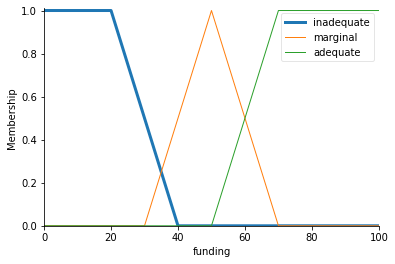

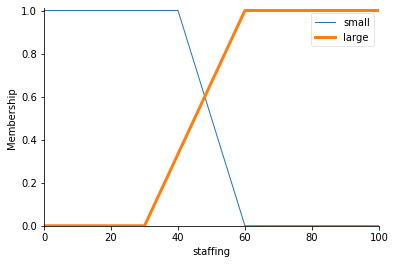

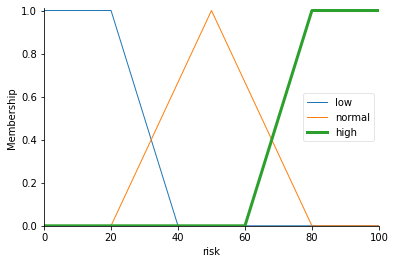

In [40]:
#viewing the graphs
funding[ 'inadequate' ].view()
staffing['large'].view()
risk['high'].view()

In [41]:
#2. Fuzzy Inferencing
rule1 = ctrl.Rule(funding[ 'adequate' ] | staffing[ 'small' ], risk[ 'low' ])
rule2 = ctrl.Rule(staffing[ 'small' ] & funding[ 'marginal' ], risk[ 'normal' ])
rule3 = ctrl.Rule(funding[ 'inadequate' ] | staffing[ 'large' ], risk[ 'high' ])

In [42]:
#3. Fuzzy Aggregation
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
final_risk = ctrl.ControlSystemSimulation(risk_ctrl)

Risk is 50.0


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


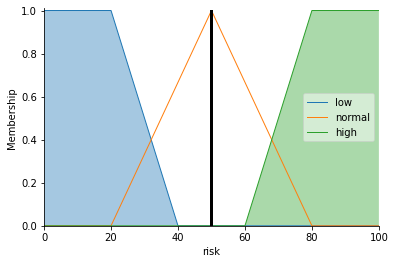

In [43]:
#4. Defuzzification
final_risk.input[ 'funding' ] = 10
final_risk.input[ 'staffing' ] = 20
final_risk.compute()
print (f"Risk is {final_risk.output[ 'risk' ]}")
risk.view(sim=final_risk)